## GLG 803 Homework 4 - Data Cleaning with OpenRefine and Code

##### By Jake Roush, 4/16/18

For this assignment I will be using an excel spreadsheet I received with data on all dams in the Mekong region. The data has already been "cleaned" by the MRC, but there is further processing we can do to get it into a form that is most useful for our needs. It has also been formatted to look good in specifically Excel, so we need to take care of that first and foremost.

I will be doing the following QA/DA on my dam dataset:

1. Removing columns/rows that are empty or unneeded for our project, dealing with second row containing column units
2. Changing year from numeric value to datetime
3. Evaluate the range of values in a field for feasibility, includes handling NAs
4. Do Data Acceptance using a scatterplot facet in Open Refine, or plotting in code.

### 1) Removing extra columns/rows, fixing second column having column units

#### OpenRefine

OpenRefine looked to be having issues when I uploaded my excel sheet containing the extra columns/rows at the start, so I manually deleted them. Still have to fix the second row containing the column's units.

This is my OpenRefine data before any processing:

![OpenRefine - Starting](OR_1.png)

I can select "parse next 2 lines as column headers" to essentially paste the contents of the second row into the first row.

There are some empty rows with no useful information. A unique characteristics of these rows is they have no "project name", so I used a text facet to search through this column and select only those rows with no project name. From there, I can easily delete them by using "remove all matching rows".

Now I want to get rid of extraneous columns that are cluttering up my project. These columns are:
- Power destination columns
- Financiers
- Developers
- Owner
- Concession period

Finally, my data looks like this:

![](OR_2.png)

#### Code (Python/Pandas)

In [2]:
import pandas as pd
rawData = pd.read_excel("G:/My Drive/Mekong NASA IDS/Mekong Data/Hydrology_Data/Dam_Data/Mekong_Dams_010617.xlsx")
# Pasting together first row values with column names - these are units, but apply to only some columns
colNames = list(rawData.columns)
for a in range(len(list(rawData.columns))):
    if pd.isna(rawData.iloc[0,a]) == False:
        colNames[a] = list(rawData.columns)[a] + " " + rawData.iloc[0,a]

rawData.columns = colNames

# Fixing a couple column names that are wonky
rawData.rename(columns={'Location Latitude': 'Latitude', 'Unnamed: 5 Longitude': 'Longitude'}, inplace=True)
# Now removing first row, which contains information we have just put into column names
rawData = rawData.loc[1:,]
# Removing rows with no project name - these are blank rows
rawData.dropna(subset=['Project name']) # This method is awesome!!!

# Getting rid of extra columns - thankfully, they are all in a row at the end
rawData.drop(columns=rawData.columns[18:], inplace = True)

rawData.head()

,Project name,Alternate name,Country,River,Latitude,Longitude,Function,Status,COD Year,Installed capacity MW,Mean annual energy GW,Max. Irrigation Area km2,Height M,Crest length M,Total storage (FSL) Million m3,Max reservoir area km2,No. displaced People,Est. cost Mil. US$
1,Ang Traepeng Thmor,NaN,CAM,Serei Sophorn,13.7857,103.3,ID,COMM,1976,NaN,NaN,NaN,NaN,NaN,NaN,126.5,NaN,NaN
2,Battambang 1,NaN,CAM,Sangker,12.8048,102.912,MPD,UCON,2017,24,123.2,NaN,49.5,4200,NaN,NaN,4350,NaN
3,Battambang 2,NaN,CAM,Sangker,12.4328,102.902,MPD,PLAN,2019,36,187,NaN,50,225,NaN,NaN,NaN,NaN
4,Battambang 3,NaN,CAM,Sangker,12.5086,102.837,HP,PLAN,NaN,13,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kamping Puoy,NaN,CAM,Sangker,13.0842,102.969,ID,COMM,1977,NaN,NaN,NaN,NaN,1900,110,NaN,NaN,NaN


### 2) Changing year from numeric value to datetime

#### OpenRefine

I could only figure out how to convert my years (come as integers) into a full date-time format and not just a date. I used a method in the GREL language that OpenRefine uses called .toDate('y')

![](OR_3.png)


It's green, so it probably changed the datatype to date.


#### Python/pandas

In [5]:
# Converting "COD Year" column to datetime format in pandas
# Stackoverflow gave me a decently elegant solution! I didn't know about .apply()
rawData['COD Year'] = pd.to_datetime(rawData['COD Year'].apply(str))

rawData.head()

,Project name,Alternate name,Country,River,Latitude,Longitude,Function,Status,COD Year,Installed capacity MW,Mean annual energy GW,Max. Irrigation Area km2,Height M,Crest length M,Total storage (FSL) Million m3,Max reservoir area km2,No. displaced People,Est. cost Mil. US$
1,Ang Traepeng Thmor,NaN,CAM,Serei Sophorn,13.7857,103.3,ID,COMM,1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,126.5,NaN,NaN
2,Battambang 1,NaN,CAM,Sangker,12.8048,102.912,MPD,UCON,2017-01-01,24,123.2,NaN,49.5,4200,NaN,NaN,4350,NaN
3,Battambang 2,NaN,CAM,Sangker,12.4328,102.902,MPD,PLAN,2019-01-01,36,187,NaN,50,225,NaN,NaN,NaN,NaN
4,Battambang 3,NaN,CAM,Sangker,12.5086,102.837,HP,PLAN,NaT,13,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kamping Puoy,NaN,CAM,Sangker,13.0842,102.969,ID,COMM,1977-01-01,NaN,NaN,NaN,NaN,1900,110,NaN,NaN,NaN


### 3) Evaluate range of values in a field and deal with NAs

#### OpenRefine

Let's look at the Latitude and Longitude columns, since those are the most useful pieces of information in this table.

Looks like my latitude ranges from 11 to 33, and my longitude ranges from 95 to 109:

![](OM_4.png)

Thankfully no craziness going on with these values.

It also looks like there are no non-numeric or errors, so every dam has a latitude-longitude coordinate. This is great! A dam without this information would be basically useless.


#### Python/pandas

In [6]:
# Finding range of latitude and longitude
minLon = min(rawData['Longitude'])

minLat = min(rawData['Latitude'])

maxLon = max(rawData['Longitude'])

maxLat = max(rawData['Latitude'])

# Utilizing that C-type printing
print('Minimum Longitude: %f\nMaximum Longitude: %f\n Minimum Latitude: %f\n Maximum Latitude: %f' % (minLon, maxLon, minLat, maxLat))

Minimum Longitude: 95.350283
Maximum Longitude: 108.316469
 Minimum Latitude: 11.633284
 Maximum Latitude: 32.884167


### 4) Data acceptance using the scatterplot facet in OpenRefine and pandas plotting

#### OpenRefine

I expect there to be a positive relationship between total storage and mean annual energy. Before I could plot these variables, I had to convert them to numbers. The conversion doesn't work if there are numbers with commas in them (i.e. 1,435). Commas were removed from variables by using the replace() function:

![](OR_5.png)

The scatterplot didn't want to export and unfortunately it is very small in OpenRefine, nevertheless it shows us that there is a relationship as we would expect:

![](OR_6.png)

#### Python/Pandas

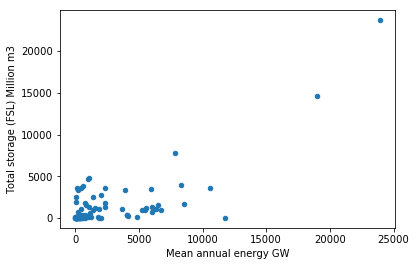

In [15]:
# Cleaning up columns I want to plot the super lazy way (don't worry Anthony, I would never do this in my research)
rawData.loc[242, 'Mean annual energy GW'] = 569
rawData.loc[244, 'Mean annual energy GW'] = 286


rawData['Mean annual energy GW'] = pd.to_numeric(rawData['Mean annual energy GW'])
rawData['Total storage (FSL) Million m3'] = pd.to_numeric(rawData['Total storage (FSL) Million m3'])

#plottingData = rawData.dropna(subset=['Mean annual energy GW'])
rawData.plot.scatter(x='Mean annual energy GW', y='Total storage (FSL) Million m3')

Well would you look at that, those plots look pretty similar!

### Importing OpenRefine data and comparing to python'd data

In [9]:
orData = pd.read_csv("S:/Users/roushjac/Misc/Class/GLG 803/Spring-2018/Homework/Homework_4/Mekong_Dams_010617-xlsx.csv")

# Are they the same???

rawData.head()

,Project name,Alternate name,Country,River,Latitude,Longitude,Function,Status,COD Year,Installed capacity MW,Mean annual energy GW,Max. Irrigation Area km2,Height M,Crest length M,Total storage (FSL) Million m3,Max reservoir area km2,No. displaced People,Est. cost Mil. US$
1,Ang Traepeng Thmor,NaN,CAM,Serei Sophorn,13.7857,103.3,ID,COMM,1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,126.5,NaN,NaN
2,Battambang 1,NaN,CAM,Sangker,12.8048,102.912,MPD,UCON,2017-01-01,24,123.2,NaN,49.5,4200,NaN,NaN,4350,NaN
3,Battambang 2,NaN,CAM,Sangker,12.4328,102.902,MPD,PLAN,2019-01-01,36,187,NaN,50,225,NaN,NaN,NaN,NaN
4,Battambang 3,NaN,CAM,Sangker,12.5086,102.837,HP,PLAN,NaT,13,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kamping Puoy,NaN,CAM,Sangker,13.0842,102.969,ID,COMM,1977-01-01,NaN,NaN,NaN,NaN,1900,110,NaN,NaN,NaN


In [10]:
orData.head()

,Project name,Alternate name,Country,River,Latitude,Longitude,Function,Status,COD Year,Installed capacity MW,Mean annual energy GW,Max. Irrigation Area km2,Height M,Crest length M,Total storage (FSL) Million m3,Max reservoir area km2,No. displaced People,Est. cost Mil. US$
0,Ang Traepeng Thmor,NaN,CAM,Serei Sophorn,13.785695,103.299777,ID,COMM,1976-01-01T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,126.5,NaN,NaN
1,Battambang 1,NaN,CAM,Sangker,12.804805,102.912094,MPD,UCON,2017-01-01T00:00:00Z,24,123.2,NaN,49.5,"4,200",NaN,NaN,"4,350",NaN
2,Battambang 2,NaN,CAM,Sangker,12.432767,102.902467,MPD,PLAN,2019-01-01T00:00:00Z,36,187,NaN,50.0,225,NaN,NaN,NaN,NaN
3,Battambang 3,NaN,CAM,Sangker,12.508622,102.837496,HP,PLAN,NaN,13,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kamping Puoy,NaN,CAM,Sangker,13.084158,102.969136,ID,COMM,1977-01-01T00:00:00Z,NaN,NaN,NaN,NaN,"1,900",110.0,NaN,NaN,NaN


I assert that these are basically the same.

### Finishing tidying up

All I feel I have to do is tidy up the column names to put parantheses around the units.

In [18]:
rawData.rename(columns={'COD Year':'COD (Year)', 
                       'Installed capacity MW':'Installed capacity (MW)', 
                       'Mean annual energy GW':'Mean annual energy (GW)', 
                       'Max. Irrigation Area km2':'Max Irrigation Area (km2)', 
                       'Height M':'Height (M)', 'Crest length M':'Crest length (M)', 
                       'Total storage (FSL) Million m3':'Total storage (FSL) (million m3)', 
                       'Max reservoir area km2':'Max reservoir area (km2)',
                      'Est. cost Mil. US$':'Est. cost (million US$)'}, inplace=True)

In [19]:
rawData.head()

,Project name,Alternate name,Country,River,Latitude,Longitude,Function,Status,COD (Year),Installed capacity (MW),Mean annual energy (GW),Max Irrigation Area (km2),Height (M),Crest length (M),Total storage (FSL) (million m3),Max reservoir area (km2),No. displaced People,Est. cost (million US$)
1,Ang Traepeng Thmor,NaN,CAM,Serei Sophorn,13.7857,103.3,ID,COMM,1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,126.5,NaN,NaN
2,Battambang 1,NaN,CAM,Sangker,12.8048,102.912,MPD,UCON,2017-01-01,24,123.2,NaN,49.5,4200,NaN,NaN,4350,NaN
3,Battambang 2,NaN,CAM,Sangker,12.4328,102.902,MPD,PLAN,2019-01-01,36,187.0,NaN,50,225,NaN,NaN,NaN,NaN
4,Battambang 3,NaN,CAM,Sangker,12.5086,102.837,HP,PLAN,NaT,13,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kamping Puoy,NaN,CAM,Sangker,13.0842,102.969,ID,COMM,1977-01-01,NaN,NaN,NaN,NaN,1900,110.0,NaN,NaN,NaN
